\author{Rahul Bhatia}  

Author: Rahul Bhatia (rb3318)  
Due Tuesday, 9/30/20


# Problem 1: EM Algorithm for spherical Gaussians & Lloyd's algorithm

## Part a
In order to use the normal densities instead of Lloyd's we simply set the weight to be 1 for the cluster who's gaussian yields the highest probability of containing the point. 

$$ w_{i,k}^{(t)} = \mathbb{1} \{ \mathcal{N}(x_i | \mu_k^{(t)}, I^d) = \max_{k} \mathcal{N}(x_i | \mu_k^{(t)}, I^d) \} $$

## Part b
In order to get hte Lloyds update, we need to compute the new centers. Since all points are either in or outside the cluster, the new centers are simply the center of mass of each assigned cluster.
$$ \mu_k^{(t+1)} =  \sum_{i=1}^{n}{\dfrac{w_{i,k}^{(t)}}{\sum_{i=1}^n{w_{i,k}^{(t)}}} x_i}$$

This resembles the EM update since it's the mean of the points but in this case we are using an _unweighted_ mean as opposed to the _weighted_ mean that EM uses.

# Problem 2: Optimizing over $K$ in Lloyd's Algorithm

If we optimized over values of $K$ as well as C, then we would end up with a result such that K = n. To see this, we simply need compute the loss for this most extreme case, where K = n. In this case, we'll find clusters such that each cluster center corresponds to a single point. Therefore each cluster $i$ will have a single point in it, and thus will converge so that the cluster center $\mu_i$ = $x_j$. When that is true, then the loss in each cluster $C_i$ will  be 0, and therefore the overall loss will be 0. 

# Problem 3: Using L1 norm in K-means type objective

It wouldn't be best to use the mean in this case. In the L2 loss case, we use the mean because the mean is what miniimizes the L2 norm. When using the L1 norm, we should instead choose to use the element-wise median of $X_j \in C_i$, since this will be the point that minimizes the sum of absolute error (the L1 loss for each cluster). 

# Problem 4: Bad Local Minima

In this case, we find that the initial randomization of $\mu_i$ will lead to an initial cluster assignment where all the points will fall into one cluster and none in the other. This would create a problem, since each iteration of the algorithm will never be able to reassign points to a different cluster and thus not identify the two clusters that exist.

For example, at every iteration, the algorithm will first reassign points based on the closest center, which will be the same as the initial assignment. Then it will compute the new cluster center, which for $\mu_1$ will be impossible since there are no points in $C_1$ and for $\mu_2$ will be something close to $\mu_2$. Either the algorithm will fail here, as it's unable to update $\mu_1$ or it will continue but be unable to improve it's solution.

# Problem 5: Projection based clustering

The intuition assumes the euclidean norm as the right way of measuring distance. This assumption comes from the fact that we're using the second moment of our data (the covariance matrix) to identify projection we will apply to our data. By choosing the covariance matrix, we're implictly assuming that the distance between points is best measured as the L2 distance. If a different notion of distance is chosen, we may want to identify a different projection / transformation.

# Problem 6: Projection based clustering (continued)

The clusters learned from $\tilde{X}$ would be the same as those from $\hat{X}$. This is because $\hat{X_i}$ will transform all points from $\mathbb{R}^d$ in the same cluster to the same value in $\mathbb{R}^k$. When we transform back to $\mathbb{R}^d$, all points in cluster $i$ will have the exact same coordinates.

In terms of performance we would expect Lloyd's to be faster when considering $\tilde{X_i}$ because it has lower dimensionality, and therefore less computational cost per iteration. 

# Problem 7: Comparing Lloyd's algorithm and Projection-based Clustering


In [1]:
######  Data  Generator  ######
import  numpy  as np

def  data_generator(seed , n, dim=9):
    mu1 = [1, 1, 1, 0, 0, 0, 0, 0, 0]
    mu2 = [0, 0, 0, 0, 0, 0, 1, 1, 1]
    mu3 = [0, 0, 0, 1, 1, 1, 0, 0, 0]
    np.random.seed(seed)
    datapoints = np.zeros((n, dim))
    labels = np.zeros(n)
    for i in  range(n):
        rand_int = np.random.choice([1, 2, 3])
        if  rand_int == 1:
            datapoints[i] = np.random.multivariate_normal(mu1 ,np.diag([2, 2, 2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]))
            labels[i] = rand_int
        elif  rand_int == 2:
            datapoints[i] = np.random.multivariate_normal(mu2 ,np.diag([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 2, 2, 2]))
            labels[i] = rand_int
        elif  rand_int == 3:
            datapoints[i] = np.random.multivariate_normal(mu3 ,np.diag([0.1, 0.1, 0.1, 2, 2, 2, 0.1, 0.1, 0.1]))
            labels[i] = rand_int
    return  datapoints , labels

In [2]:
data = {n: [data_generator(seed, n) for seed in range(1, 6)] for n in range(100, 1100, 100)}

In [3]:
import pandas as pd
import seaborn as sns
from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

sns.set()

## Part a: Plot Rand Index vs Size of Set

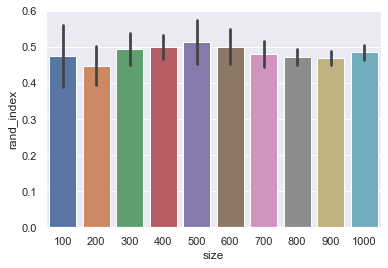

In [4]:
results = defaultdict(dict)
for size, datasets in data.items():
    for i, (datapoints, labels) in enumerate(datasets):
        kmeans = KMeans(n_clusters=3).fit(datapoints)
        rand_score = adjusted_rand_score(labels, kmeans.labels_)
        results[size][i+1] = rand_score
        
results_df =  pd.DataFrame(results).stack().reset_index()
results_df.columns = ['seed', 'size', 'rand_index']
sns.barplot(x='size', y='rand_index', ci='sd', data=results_df);

In [5]:
 ## TODO REMOVE
results_df.groupby('size').agg({'rand_index': [np.mean, np.std]}).T

size                 100       200       300       400       500       600   \
rand_index mean  0.473575  0.447706  0.493209  0.499241  0.512144  0.499445   
           std   0.095035  0.059441  0.050600  0.036351  0.068239  0.054436   

size                 700       800       900       1000  
rand_index mean  0.479630  0.471713  0.468842  0.484440  
           std   0.040204  0.025428  0.021032  0.024034

## Part b: Plot Rand Index Vs Size of Set when using PCA

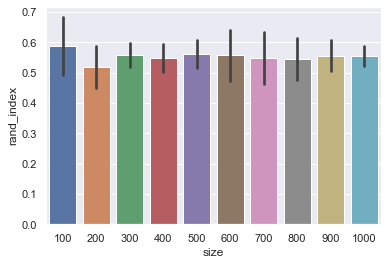

In [6]:
pca_results = defaultdict(dict)
for size, datasets in data.items():
    for i, (datapoints, labels) in enumerate(datasets):
        x_hat = PCA(n_components=3).fit_transform(datapoints)
        kmeans = KMeans(n_clusters=3).fit(x_hat)
        rand_score = adjusted_rand_score(labels, kmeans.labels_)
        pca_results[size][i+1] = rand_score
        
pca_results_df =  pd.DataFrame(pca_results).stack().reset_index()
pca_results_df.columns = ['seed', 'size', 'rand_index']
sns.barplot(x='size', y='rand_index', ci='sd', data=pca_results_df);

In [7]:
 ## TODO REMOVE
pca_results_df.groupby('size').agg({'rand_index': [np.mean, np.std]}).T

size                 100       200       300       400       500       600   \
rand_index mean  0.587940  0.518710  0.558204  0.547903  0.562996  0.557317   
           std   0.106142  0.079148  0.043186  0.052876  0.051740  0.094711   

size                 700       800       900       1000  
rand_index mean  0.547949  0.543940  0.556401  0.556287  
           std   0.096561  0.077503  0.056375  0.037101

## Part c: Comparison between (a) and (b)

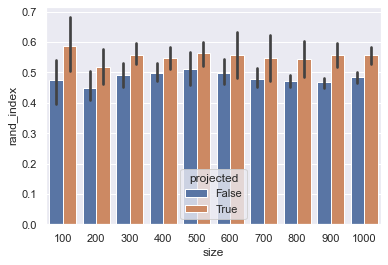

In [8]:
sns.barplot(x='size', y='rand_index', hue='projected', data=pd.concat([results_df.assign(projected=False), pca_results_df.assign(projected=True)]));

In [9]:
std_dev = results_df.groupby('size').agg({'rand_index': [np.mean, np.std]})[('rand_index', 'std')]
pca_std_dev = pca_results_df.groupby('size').agg({'rand_index': [np.mean, np.std]})[('rand_index', 'std')] 
((pca_std_dev - std_dev) / std_dev).rename('Percent Change in Std').to_frame().T.style.format("{:.2%}")

The clustering of the data that has been transformed using PCA (projected = True) seems to be significantly better than that of the data without the transformation. This results in an improvment of up to .1 in the average rand_index. In addition to that increase in performance, the stddev of the rand index drops in the transformed data for most of the dataset sizes. 

# Problem 8: Comparing K-Means, Meanshift, and Spectral Clustering on synthetic data

In [10]:
import random 
import math
import matplotlib.pyplot as plt 
from sklearn.cluster import MeanShift, KMeans, SpectralClustering, estimate_bandwidth

In [11]:
def create_datasets(seed):
    random.seed(seed)
    
    ##Data set 1
    X1 = []
    for i in range(1000):
        theta = random.uniform(0,2*math.pi)
        radius = random.gauss(0,0.2)+random.choice([1,3])
        X1.append([radius*math.cos(theta),radius*math.sin(theta)])
    X1 = np.array(X1)
    ##Data Set 2
    X2 = []
    for i in range(1000):
        theta = random.uniform(0,2*math.pi)
        radius = random.gauss(0,0.1) + 2
        if theta<math.pi:
            X2.append([radius*math.cos(theta)-1,radius*math.sin(theta)])
        else:
            X2.append([radius*math.cos(theta)+1,radius*math.sin(theta)])
    X2 = np.array(X2)
    ##Data Set 3
    X3 = []
    for i in range(1000):
        radius = random.gauss(0,1)
        theta = random.uniform(0,2*math.pi)
        center = random.choice([[0,1],[3,3],[1,-3]])
        X3.append([radius*math.cos(theta)+center[0],radius*math.sin(theta)+center[1]])
    X3 = np.array(X3)
    return X1, X2, X3

def plot_clusters(X, label_pred=None, ax=None):
    mark = ['or', 'ob', 'oy', 'g','c','m','k','w']
    j = 0
    if label_pred is None:
        label_pred = np.zeros(X.shape[0]).astype('int')
    for i in label_pred:
        if ax is not None:
            ax.plot([X[j:j+1,0]], [X[j:j+1,1]], mark[i], markersize = 5)
        else:
            plt.plot([X[j:j+1,0]], [X[j:j+1,1]], mark[i], markersize = 5)
        j +=1 

In [12]:
X = create_datasets(0)

## Part a: K-Means

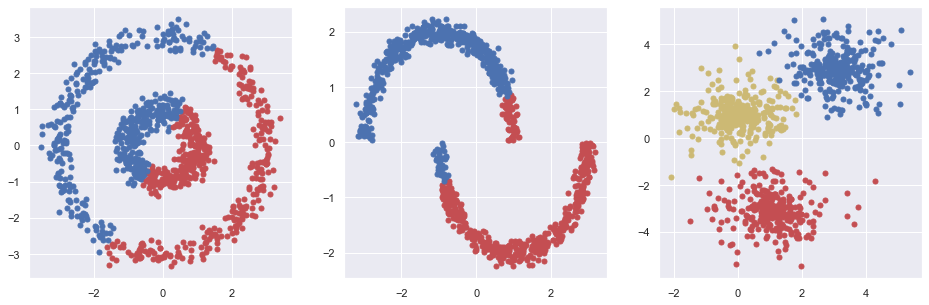

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

plot_clusters(X[0], KMeans(n_clusters=2).fit(X[0]).labels_, ax=ax[0])
plot_clusters(X[1], KMeans(n_clusters=2).fit(X[1]).labels_, ax=ax[1])
plot_clusters(X[2], KMeans(n_clusters=3).fit(X[2]).labels_, ax=ax[2])

KMeans performs best on the third dataset, but terribly on the first and poorly on the second. 
 - In the first dataset, KMeans fails because the data is clearly not separable by any linear separator. If we consider the ideal mean of the outer ring and inner ring, we would actually get very similar means.
 - In the second dataset, thee best possible linear separator performs okay, but it cannot perfectly separate the data into clusters. What we find is that any circle we draw that tries to contain the points from one cluster as best as possible will inadvertantly include points from another cluster.
 - In the third dataset, the data is pretty clustered, so K-Means doesn't have trouble finding good center. The clusters are circular in nature so the mean performs well as a measure of cluster center in the original space.
 

## Part b: Meanshift

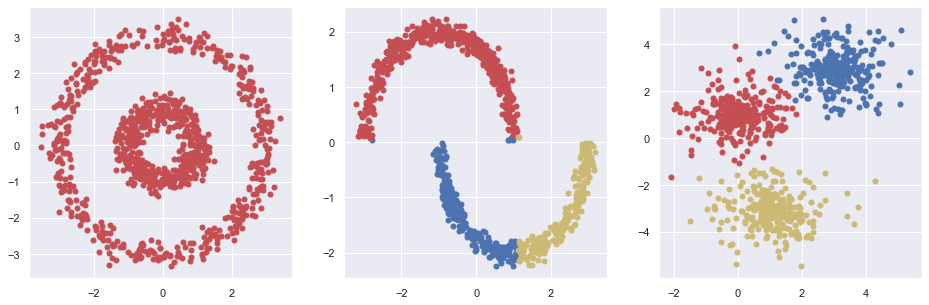

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

plot_clusters(X[0], MeanShift(bandwidth=estimate_bandwidth(X[0], quantile=0.2)).fit(X[0]).labels_, ax=ax[0])
plot_clusters(X[1], MeanShift(bandwidth=estimate_bandwidth(X[1], quantile=0.2)).fit(X[1]).labels_, ax=ax[1])
plot_clusters(X[2], MeanShift(bandwidth=estimate_bandwidth(X[2], quantile=0.2)).fit(X[2]).labels_, ax=ax[2])

MeanShift performs well in the third dataset too, but cannot separate the data in dataset 1. It does improve on the separation in dataset 2, though is still not perfect. 
 - MeanShift is a centroid based algorithm, which associates poitns to clusters by checking the distance to the cluster's centroid. Since the centroid of the two clusters in dataset 1 overlap, this will fail to separate our data. 
 - Dataset 2 ends up taking on 3 clusters because our method of estimating cluster cardinality is dependent on the shape of the data.
 - Once again, dataset 3 is well separable since the data is clustered in euclidean space with no overlap.
 

## Part C: Spectral Clustering

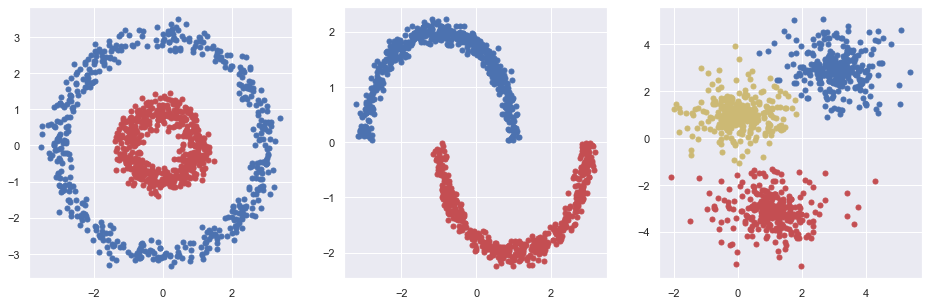

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

plot_clusters(X[0], SpectralClustering(n_clusters=2).fit(X[0]).labels_, ax=ax[0])
plot_clusters(X[1], SpectralClustering(n_clusters=2).fit(X[1]).labels_, ax=ax[1])
plot_clusters(X[2], SpectralClustering(n_clusters=3).fit(X[2]).labels_, ax=ax[2])

Spectral clustering performs well on all three of our synthetic datasets. 


# Problem 9: Kernel Density Estimator


For $\hat{f}(x)$ to be a valid density, it must satisfy two relationships: $\hat{f}(x) \ge 0$ and $\int{\hat{f}(x)}dx = 1$

Show $\hat{f}(x) \ge 0$:
    1. Since $K(u) \ge 0$ we know that $\sum_{i=1}^{n}{K(\dfrac{x - x_i}{h})} \ge 0$ since it's the sum of non-negative numbers.  
    2. since n, the number of data points, must be postiive, h is defined to be positive, and d, the dimension of x, is positive, we know that $\dfrac{1}{nh^d}$ is positive  
    3. Therefore, we know that the product of the first two must be non-negative. Hence $\hat{f}(x) \ge 0$
    
Show $\int{ \hat{f}(x) dx} = 1$: 
    $$\int{\dfrac{1}{nh^d}\sum_{i=1}^{n}{K(\dfrac{x - x_i}{h})}dx}$$
    $$ = \dfrac{1}{nh^d}\int{\sum_{i=1}^{n}{K(\dfrac{x - x_i}{h})}dx} $$
    $$ = \dfrac{1}{nh^d}\sum_{i=1}^{n}\int{{K(\dfrac{x - x_i}{h})}dx} $$
    $$ let\: u = \dfrac{x - x_i}{h}, du = \dfrac{dx}{h^d}$$
    $$ = \dfrac{1}{nh^d}\sum_{i=1}^{n}\int{h^d{K(u)}dx} $$
    $$ = \dfrac{1}{n}\sum_{i=1}^{n}\int{{K(u)}dx} $$
    $$ = \dfrac{1}{n}\sum_{i=1}^n{1} $$
    $$ = \dfrac{1}{n} * n $$
    $$ = 1 $$
    
Therefore, $\hat{f}(x)$ is a valid density